In [2]:
import snowflake.connector
import pandas as pd

# Set up connection parameters
user = "Mithun"
password = "Mithun123!!"
account = "lz05490.central-india.azure"
warehouse = "COMPUTE_WH"
database = "TIMESHEET"
schema = "FAKEDATA"
role = "ACCOUNTADMIN"
retry_attempts = 3  # Number of retry attempts

def establish_connection():
    try:
        # Establish connection
        conn = snowflake.connector.connect(
            user=user,
            password=password,
            account=account,
            warehouse=warehouse,
            database=database,
            schema=schema,
            role=role
        )
        return conn
    except snowflake.connector.errors.OperationalError as e:
        print(f"Connection error: {e}")
        return None

# Attempt to establish connection with retries
for attempt in range(retry_attempts):
    print(f"Attempting to connect (Attempt {attempt + 1})...")
    connection = establish_connection()
    if connection:
        print("Connection established successfully!")
        break
    else:
        print("Retrying connection...")
else:
    print("Failed to establish connection after multiple attempts.")

# If connection is successful, proceed with executing queries
if connection:
    # Create a cursor object
    cur = connection.cursor()

    # Execute a query to select data from the table
    cur.execute('SELECT * FROM TIMESHEET.FAKEDATA.FINALDATA')

    # Fetch the results
    rows = cur.fetchall()

    # Close the cursor and connection
    cur.close()
    connection.close()

    # Convert the result into a pandas DataFrame for easier manipulation
    df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])
    print(df.head())  # Display the first few rows of the DataFrame


Attempting to connect (Attempt 1)...
Connection established successfully!
             NAME                  EMAIL USERTYPE               ROLE  \
0   Joseph Peters  abigail38@example.com     user  software engineer   
1   Joseph Peters  abigail38@example.com     user  software engineer   
2   Joseph Peters  abigail38@example.com     user  software engineer   
3   Joseph Peters  abigail38@example.com     user  software engineer   
4  Jennifer Welch     aclark@example.org     user         consultant   

        PROJECT_NAME                             PROJECTID  \
0  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
1  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
2  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
3  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
4       Mcguire-Hall  24ac78dd-f13b-4b1c-b268-f4005d794c8e   

  PROJECT_START_PERIOD PROJECT_END_PERIOD    CATEGORY ALLOCATION_START  ...  \
0           2024-03-02         2024-06-28

In [3]:
df.head(5)

,NAME,EMAIL,USERTYPE,ROLE,PROJECT_NAME,PROJECTID,PROJECT_START_PERIOD,PROJECT_END_PERIOD,CATEGORY,ALLOCATION_START,...,SUN,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS
0,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
1,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,1.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
2,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
3,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,8.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
4,Jennifer Welch,aclark@example.org,user,consultant,Mcguire-Hall,24ac78dd-f13b-4b1c-b268-f4005d794c8e,2024-02-10,2024-06-09,Mobile App,2024-03-18,...,0.0,2024-03-19,2024-04-17,3,5,2,2,2,1,Similar left must step sound price add. Voice ...


EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAME                   2243 non-null   object 
 1   EMAIL                  2243 non-null   object 
 2   USERTYPE               2243 non-null   object 
 3   ROLE                   2243 non-null   object 
 4   PROJECT_NAME           2243 non-null   object 
 5   PROJECTID              2243 non-null   object 
 6   PROJECT_START_PERIOD   2243 non-null   object 
 7   PROJECT_END_PERIOD     2243 non-null   object 
 8   CATEGORY               2243 non-null   object 
 9   ALLOCATION_START       2243 non-null   object 
 10  ALLOCATION_END         2243 non-null   object 
 11  START_PERIOD           2078 non-null   object 
 12  END_PERIOD             2078 non-null   object 
 13  ACTIVITY               2078 non-null   object 
 14  COMMENTS               2078 non-null   object 
 15  MON 

In [5]:
df.head()

,NAME,EMAIL,USERTYPE,ROLE,PROJECT_NAME,PROJECTID,PROJECT_START_PERIOD,PROJECT_END_PERIOD,CATEGORY,ALLOCATION_START,...,SUN,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS
0,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
1,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,1.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
2,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
3,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,8.0,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...
4,Jennifer Welch,aclark@example.org,user,consultant,Mcguire-Hall,24ac78dd-f13b-4b1c-b268-f4005d794c8e,2024-02-10,2024-06-09,Mobile App,2024-03-18,...,0.0,2024-03-19,2024-04-17,3,5,2,2,2,1,Similar left must step sound price add. Voice ...


In [6]:
df.isnull().sum()

NAME                       0
EMAIL                      0
USERTYPE                   0
ROLE                       0
PROJECT_NAME               0
PROJECTID                  0
PROJECT_START_PERIOD       0
PROJECT_END_PERIOD         0
CATEGORY                   0
ALLOCATION_START           0
ALLOCATION_END             0
START_PERIOD             165
END_PERIOD               165
ACTIVITY                 165
COMMENTS                 165
MON                      165
TUE                      165
WED                      165
THUR                     165
FRI                      165
SAT                      165
SUN                      165
FEEDBACK_START_PERIOD      0
FEEDBACK_END_PERIOD        0
Q1                         0
Q2                         0
Q3                         0
Q4                         0
Q5                         0
Q6                         0
FEEDBACK_COMMENTS          0
dtype: int64

In [7]:
df.describe()

,MON,TUE,WED,THUR,FRI,SAT,SUN,Q1,Q2,Q3,Q4,Q5,Q6
count,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2078.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000,2243.000000
mean,3.925409,3.943215,4.042830,3.836381,4.037536,4.065448,3.965833,3.008471,2.947392,3.116808,3.008471,2.972358,3.019617
std,2.515378,2.537091,2.552594,2.568313,2.606524,2.562000,2.550083,1.455991,1.406274,1.436338,1.413084,1.448535,1.392464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df.nunique()

NAME                     1001
EMAIL                     997
USERTYPE                    1
ROLE                        8
PROJECT_NAME              425
PROJECTID                 433
PROJECT_START_PERIOD       61
PROJECT_END_PERIOD         61
CATEGORY                    4
ALLOCATION_START           31
ALLOCATION_END             31
START_PERIOD                8
END_PERIOD                  7
ACTIVITY                    4
COMMENTS                  861
MON                         9
TUE                         9
WED                         9
THUR                        9
FRI                         9
SAT                         9
SUN                         9
FEEDBACK_START_PERIOD      31
FEEDBACK_END_PERIOD        30
Q1                          5
Q2                          5
Q3                          5
Q4                          5
Q5                          5
Q6                          5
FEEDBACK_COMMENTS        1000
dtype: int64

In [9]:
df.columns

Index(['NAME', 'EMAIL', 'USERTYPE', 'ROLE', 'PROJECT_NAME', 'PROJECTID',
       'PROJECT_START_PERIOD', 'PROJECT_END_PERIOD', 'CATEGORY',
       'ALLOCATION_START', 'ALLOCATION_END', 'START_PERIOD', 'END_PERIOD',
       'ACTIVITY', 'COMMENTS', 'MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT',
       'SUN', 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'FEEDBACK_COMMENTS'],
      dtype='object')

USERTYPE
user    1.0
Name: proportion, dtype: float64


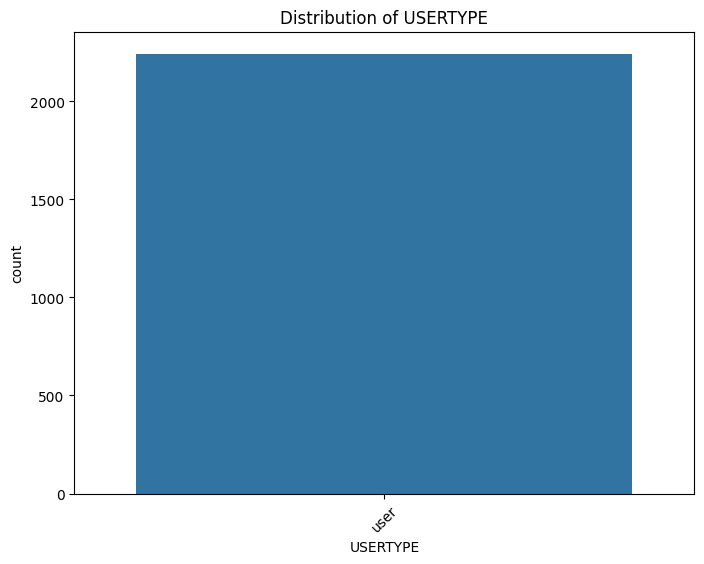

ROLE
intern               0.284440
software engineer    0.251449
consultant           0.232724
tribe master         0.222916
Intern               0.004458
Consultant           0.002229
Tribe Master         0.001337
Software Engineer    0.000446
Name: proportion, dtype: float64


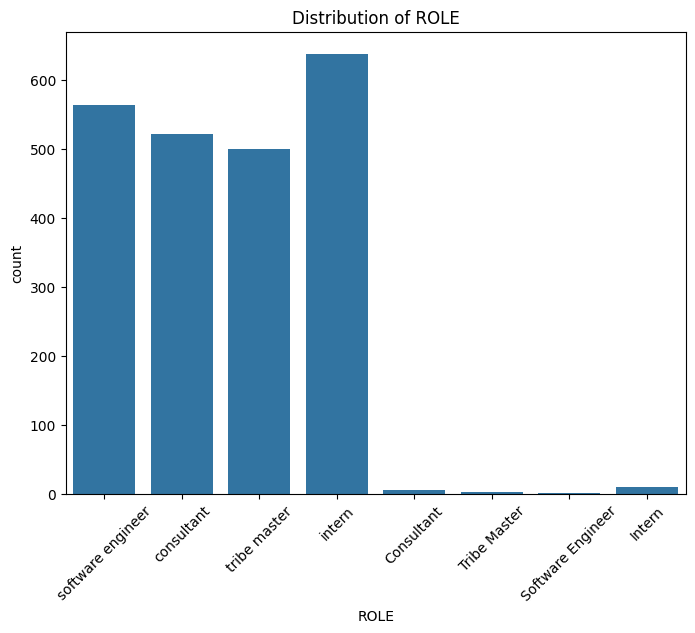

CATEGORY
Data Science       0.275970
Mobile App         0.267945
Web Development    0.267499
AI/ML              0.188587
Name: proportion, dtype: float64


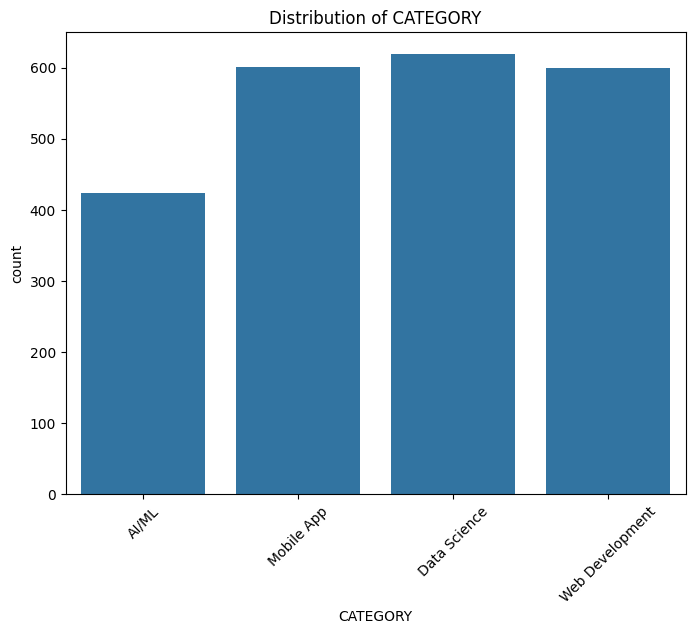

               MON          TUE          WED         THUR          FRI  \
count  2078.000000  2078.000000  2078.000000  2078.000000  2078.000000   
mean      3.925409     3.943215     4.042830     3.836381     4.037536   
std       2.515378     2.537091     2.552594     2.568313     2.606524   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       4.000000     4.000000     4.000000     4.000000     4.000000   
75%       6.000000     6.000000     6.000000     6.000000     6.000000   
max       8.000000     8.000000     8.000000     8.000000     8.000000   

               SAT          SUN  
count  2078.000000  2078.000000  
mean      4.065448     3.965833  
std       2.562000     2.550083  
min       0.000000     0.000000  
25%       2.000000     2.000000  
50%       4.000000     4.000000  
75%       6.000000     6.000000  
max       8.000000     8.000000  


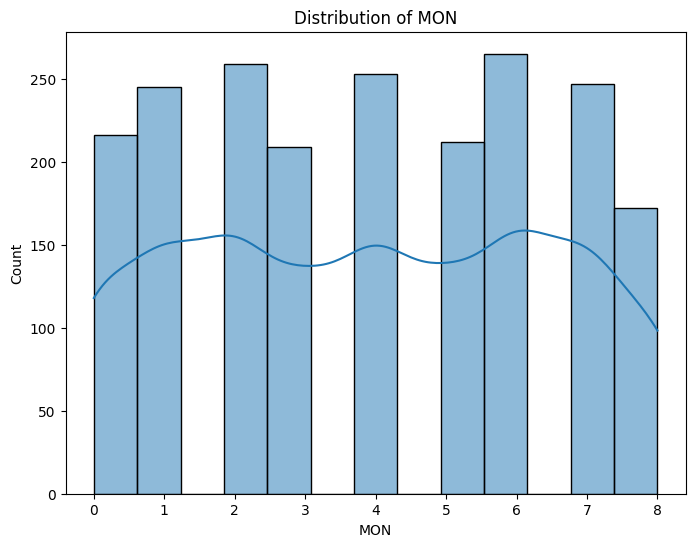

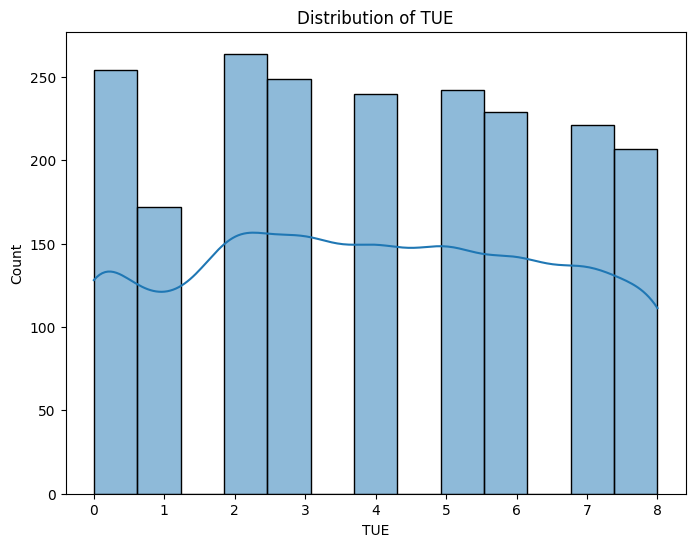

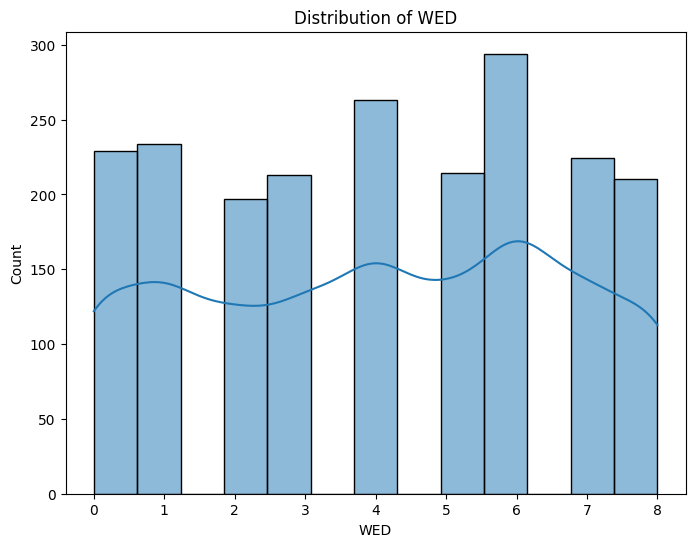

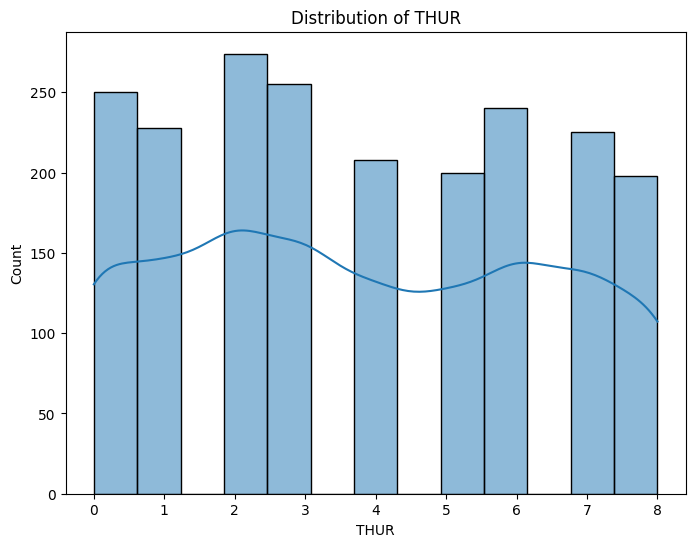

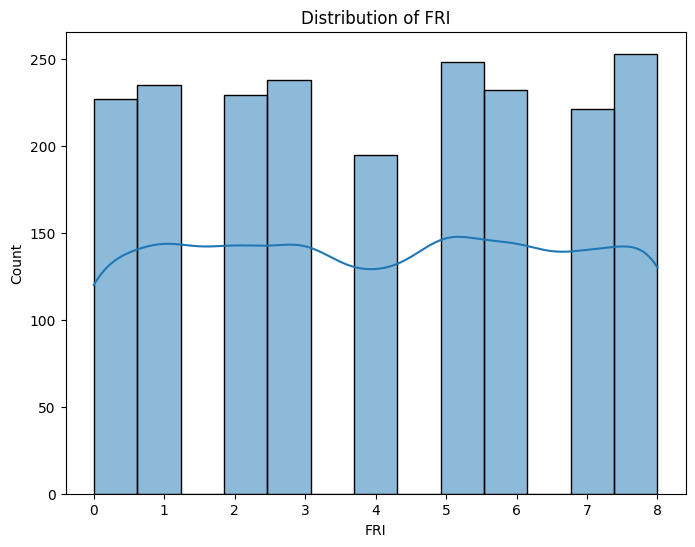

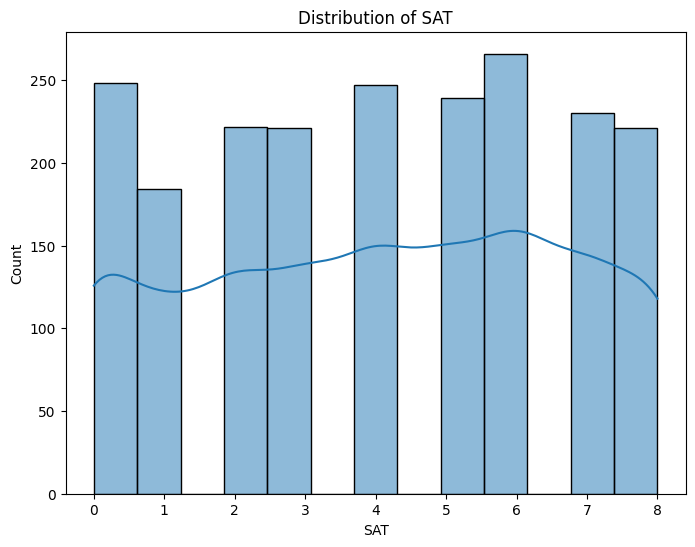

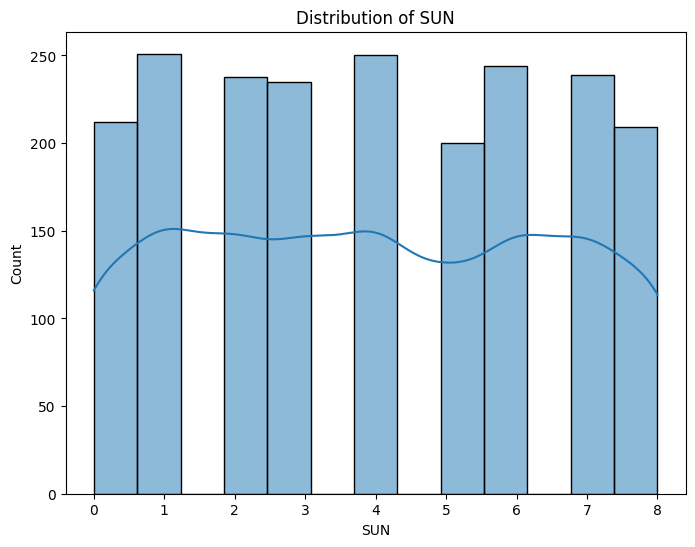

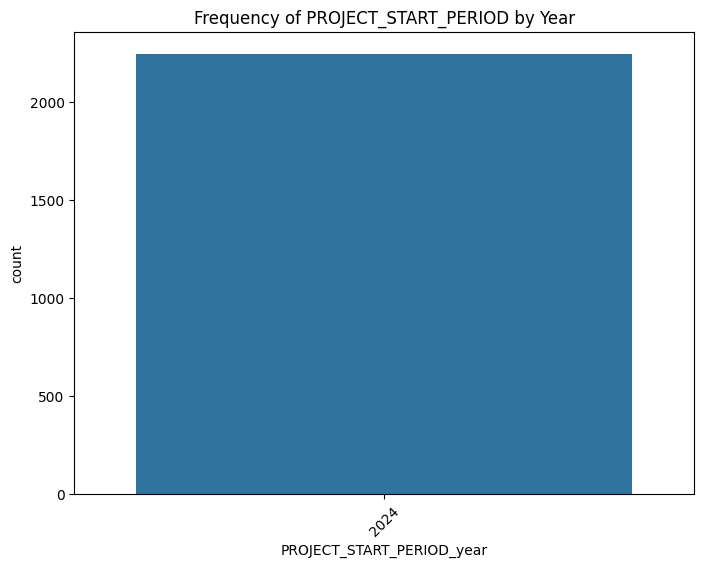

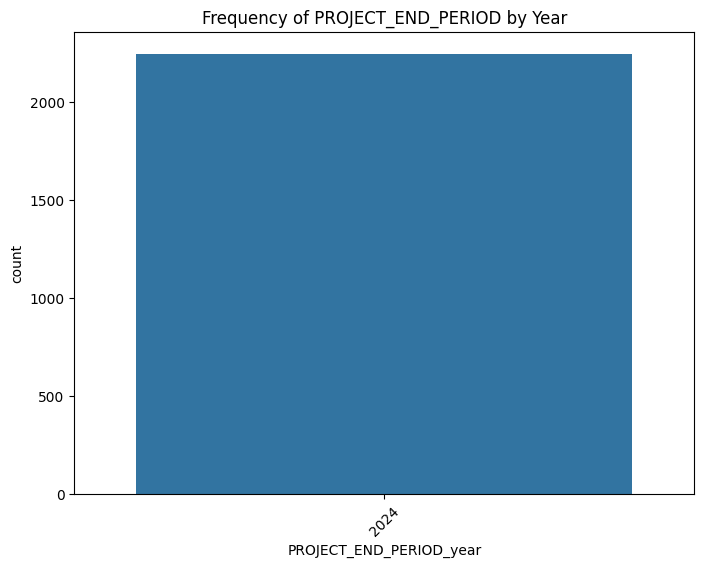

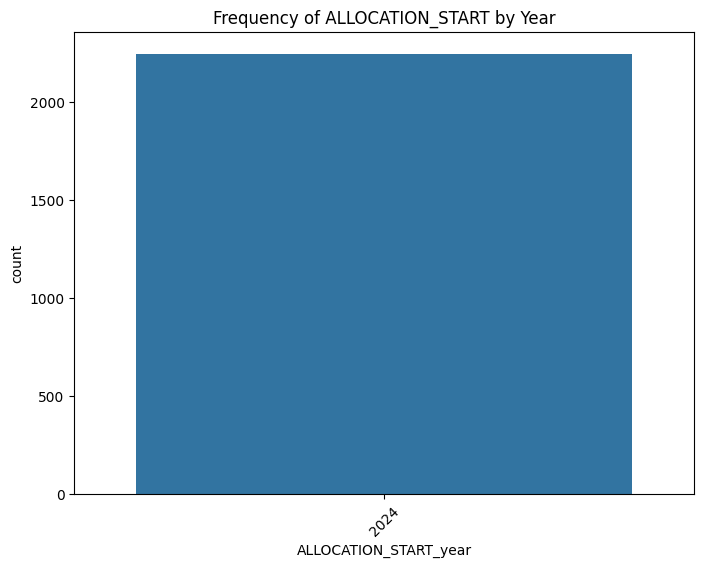

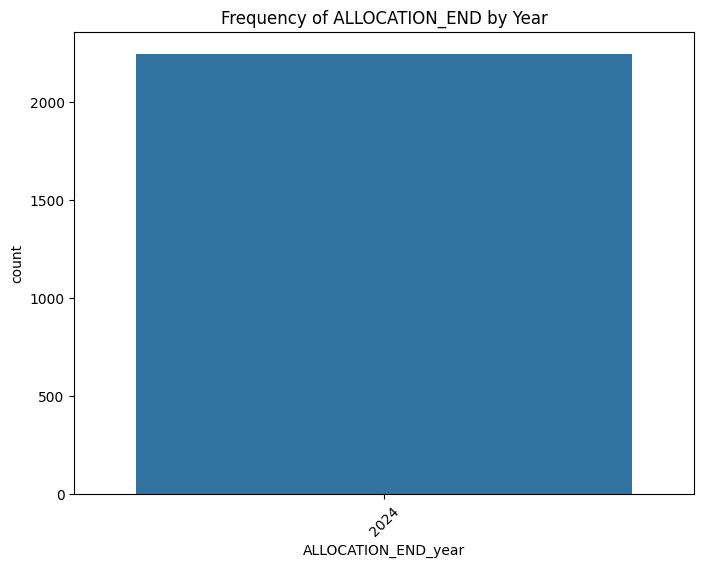

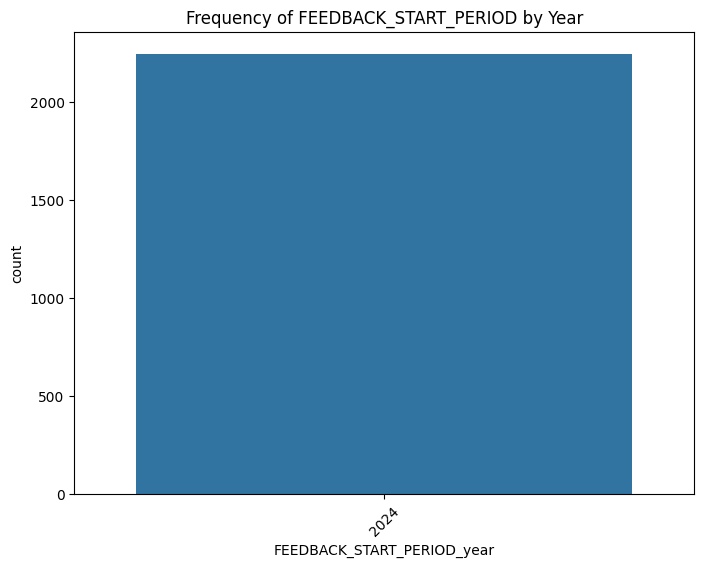

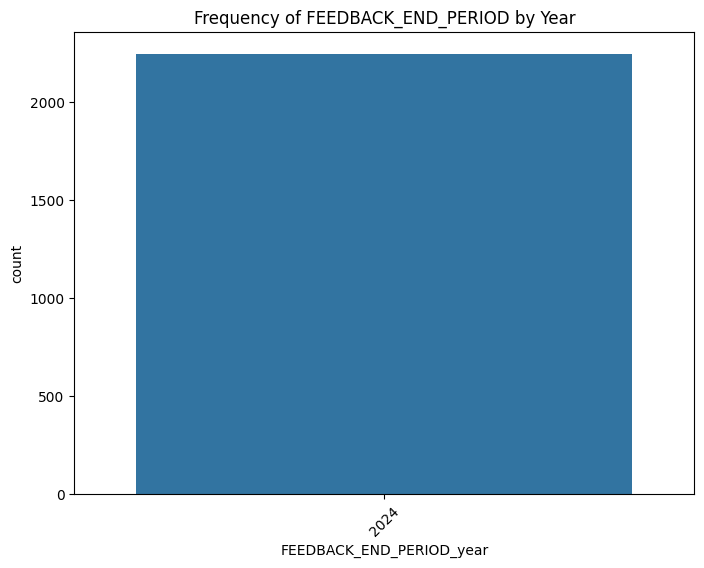

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the dataset
# Perform univariate analysis for different types of variables

# Categorical Variables
categorical_vars = ['USERTYPE', 'ROLE', 'CATEGORY']
for var in categorical_vars:
    print(df[var].value_counts(normalize=True))  # Display frequency counts and percentages
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

# Numerical Variables
numerical_vars = ['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN']
print(df[numerical_vars].describe())  # Display descriptive statistics
for var in numerical_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

# Temporal Variables (assuming they are in datetime format)
temporal_vars = ['PROJECT_START_PERIOD', 'PROJECT_END_PERIOD', 'ALLOCATION_START', 'ALLOCATION_END',
                 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD']
for var in temporal_vars:
    df[var] = pd.to_datetime(df[var])  # Convert to datetime if not already
    df[var + '_year'] = df[var].dt.year  # Extract year component for analysis
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var + '_year', data=df)
    plt.title(f'Frequency of {var} by Year')
    plt.xticks(rotation=45)
    plt.show()

# Textual Variables
textual_vars = ['COMMENTS', 'FEEDBACK_COMMENTS']
# Perform text preprocessing and analysis as needed


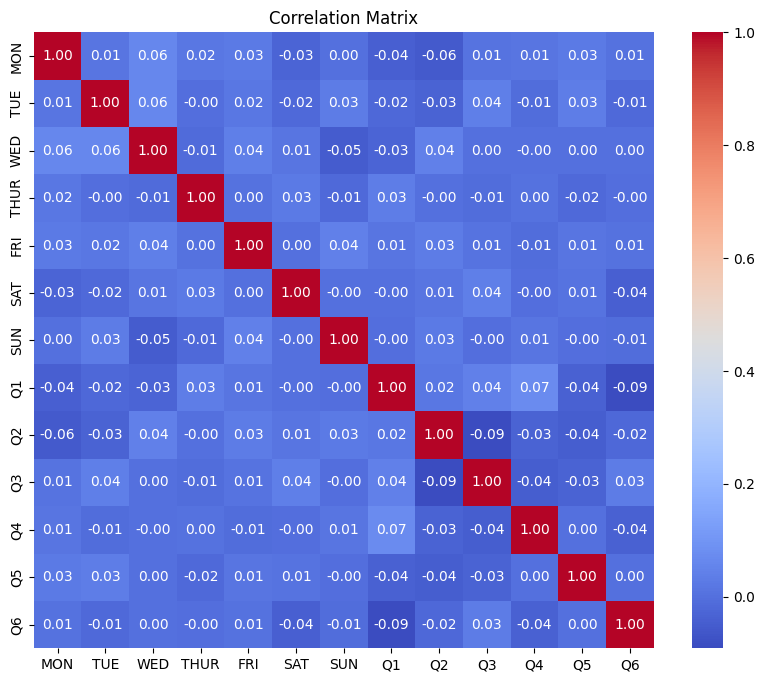

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset
# Select numerical columns for correlation analysis
numerical_cols = ['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [12]:
import pandas as pd

# Assuming df is your DataFrame containing the dataset

# Selecting numerical columns for correlation analysis
numerical_cols = ['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN']

# Calculate Spearman correlation matrix
correlation_matrix = df[numerical_cols].corr(method='spearman')

# Display the correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix)

Spearman Correlation Matrix:
           MON       TUE       WED      THUR       FRI       SAT       SUN
MON   1.000000  0.011853  0.059075  0.021372  0.025240 -0.030226  0.000799
TUE   0.011853  1.000000  0.061901 -0.002516  0.017813 -0.015648  0.028603
WED   0.059075  0.061901  1.000000 -0.013698  0.038457  0.010155 -0.051010
THUR  0.021372 -0.002516 -0.013698  1.000000  0.000842  0.025795 -0.013720
FRI   0.025240  0.017813  0.038457  0.000842  1.000000  0.001904  0.041247
SAT  -0.030226 -0.015648  0.010155  0.025795  0.001904  1.000000  0.001254
SUN   0.000799  0.028603 -0.051010 -0.013720  0.041247  0.001254  1.000000


In [13]:
df.head()

,NAME,EMAIL,USERTYPE,ROLE,PROJECT_NAME,PROJECTID,PROJECT_START_PERIOD,PROJECT_END_PERIOD,CATEGORY,ALLOCATION_START,...,Q4,Q5,Q6,FEEDBACK_COMMENTS,PROJECT_START_PERIOD_year,PROJECT_END_PERIOD_year,ALLOCATION_START_year,ALLOCATION_END_year,FEEDBACK_START_PERIOD_year,FEEDBACK_END_PERIOD_year
0,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3,1,5,Visit why hard because believe produce accept ...,2024,2024,2024,2024,2024,2024
1,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3,1,5,Visit why hard because believe produce accept ...,2024,2024,2024,2024,2024,2024
2,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3,1,5,Visit why hard because believe produce accept ...,2024,2024,2024,2024,2024,2024
3,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,AI/ML,2024-03-20,...,3,1,5,Visit why hard because believe produce accept ...,2024,2024,2024,2024,2024,2024
4,Jennifer Welch,aclark@example.org,user,consultant,Mcguire-Hall,24ac78dd-f13b-4b1c-b268-f4005d794c8e,2024-02-10,2024-06-09,Mobile App,2024-03-18,...,2,2,1,Similar left must step sound price add. Voice ...,2024,2024,2024,2024,2024,2024


FEATURE ENGINEERING

In [14]:
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])

    # Calculate total worked hours per week
days_of_week = ['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN']
df['TOTAL_WORKED_HOURS'] = df[days_of_week].sum(axis=1)

    # Display the first few rows of the DataFrame with the new column
print(df.head())

             NAME                  EMAIL USERTYPE               ROLE  \
0   Joseph Peters  abigail38@example.com     user  software engineer   
1   Joseph Peters  abigail38@example.com     user  software engineer   
2   Joseph Peters  abigail38@example.com     user  software engineer   
3   Joseph Peters  abigail38@example.com     user  software engineer   
4  Jennifer Welch     aclark@example.org     user         consultant   

        PROJECT_NAME                             PROJECTID  \
0  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
1  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
2  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
3  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
4       Mcguire-Hall  24ac78dd-f13b-4b1c-b268-f4005d794c8e   

  PROJECT_START_PERIOD PROJECT_END_PERIOD    CATEGORY ALLOCATION_START  ...  \
0           2024-03-02         2024-06-28       AI/ML       2024-03-20  ...   
1           2024-03-02         2024-

In [15]:
df.to_csv('total_worked_hours.csv', index=False)


In [16]:
def categorize_hours(total_hours):
    if total_hours < 20:
        return 'Irregular'
    elif total_hours >= 20 and total_hours < 40:
        return 'Regular'
    else:
        return 'Hard Worker'

# Apply the categorize_hours function to the 'TOTAL_WORKED_HOURS' column
df['CATEGORY'] = df['TOTAL_WORKED_HOURS'].apply(categorize_hours)

# Display the DataFrame with the new 'CATEGORY' column
print(df.head())


             NAME                  EMAIL USERTYPE               ROLE  \
0   Joseph Peters  abigail38@example.com     user  software engineer   
1   Joseph Peters  abigail38@example.com     user  software engineer   
2   Joseph Peters  abigail38@example.com     user  software engineer   
3   Joseph Peters  abigail38@example.com     user  software engineer   
4  Jennifer Welch     aclark@example.org     user         consultant   

        PROJECT_NAME                             PROJECTID  \
0  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
1  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
2  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
3  Sheppard and Sons  b5a66681-6e00-4fd7-aa62-aa34b4f16d39   
4       Mcguire-Hall  24ac78dd-f13b-4b1c-b268-f4005d794c8e   

  PROJECT_START_PERIOD PROJECT_END_PERIOD   CATEGORY ALLOCATION_START  ...  \
0           2024-03-02         2024-06-28    Regular       2024-03-20  ...   
1           2024-03-02         2024-06

In [17]:
df.to_csv('categorized_hours.csv', index=False)
print("Updated DataFrame saved as CSV file: categorized_hours.csv")

Updated DataFrame saved as CSV file: categorized_hours.csv


In [18]:
df.head(2)

,NAME,EMAIL,USERTYPE,ROLE,PROJECT_NAME,PROJECTID,PROJECT_START_PERIOD,PROJECT_END_PERIOD,CATEGORY,ALLOCATION_START,...,FEEDBACK_START_PERIOD,FEEDBACK_END_PERIOD,Q1,Q2,Q3,Q4,Q5,Q6,FEEDBACK_COMMENTS,TOTAL_WORKED_HOURS
0,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,Regular,2024-03-20,...,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...,27.0
1,Joseph Peters,abigail38@example.com,user,software engineer,Sheppard and Sons,b5a66681-6e00-4fd7-aa62-aa34b4f16d39,2024-03-02,2024-06-28,Irregular,2024-03-20,...,2024-03-13,2024-05-05,2,1,4,3,1,5,Visit why hard because believe produce accept ...,15.0


In [19]:
df.columns

Index(['NAME', 'EMAIL', 'USERTYPE', 'ROLE', 'PROJECT_NAME', 'PROJECTID',
       'PROJECT_START_PERIOD', 'PROJECT_END_PERIOD', 'CATEGORY',
       'ALLOCATION_START', 'ALLOCATION_END', 'START_PERIOD', 'END_PERIOD',
       'ACTIVITY', 'COMMENTS', 'MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT',
       'SUN', 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'FEEDBACK_COMMENTS', 'TOTAL_WORKED_HOURS'],
      dtype='object')

In [20]:
removeColumns=['NAME', 'EMAIL', 'USERTYPE',  'PROJECTID',
       'PROJECT_START_PERIOD', 'PROJECT_END_PERIOD', 
       'ALLOCATION_START', 'ALLOCATION_END', 'START_PERIOD', 'END_PERIOD',
       'COMMENTS', 'FEEDBACK_START_PERIOD', 'FEEDBACK_END_PERIOD', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6', 'FEEDBACK_COMMENTS','PROJECT_NAME']
df1=df.copy()
df1=df1.drop(columns=removeColumns)

In [21]:
df1.head(5)

,ROLE,CATEGORY,ACTIVITY,MON,TUE,WED,THUR,FRI,SAT,SUN,TOTAL_WORKED_HOURS
0,software engineer,Regular,Testing,8.0,3.0,3.0,5.0,0.0,5.0,3.0,27.0
1,software engineer,Irregular,Testing,6.0,0.0,1.0,2.0,3.0,2.0,1.0,15.0
2,software engineer,Regular,Documentation,8.0,7.0,8.0,1.0,3.0,5.0,3.0,35.0
3,software engineer,Regular,Documentation,4.0,4.0,4.0,3.0,4.0,8.0,8.0,35.0
4,consultant,Regular,Meetings,7.0,3.0,1.0,8.0,3.0,1.0,0.0,23.0


In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()
df1['ROLE'] = df1['ROLE'].str.lower()


# Assume df is your DataFrame with the columns ROLE and CATEGORY
df1['ROLE_ENCODED'] = label_encoder.fit_transform(df1['ROLE'])
df1['ACTIVITY_ENCODED'] = label_encoder.fit_transform(df1['ACTIVITY'])

# Display the updated DataFrame
df1.head()

,ROLE,CATEGORY,ACTIVITY,MON,TUE,WED,THUR,FRI,SAT,SUN,TOTAL_WORKED_HOURS,ROLE_ENCODED,ACTIVITY_ENCODED
0,software engineer,Regular,Testing,8.0,3.0,3.0,5.0,0.0,5.0,3.0,27.0,2,3
1,software engineer,Irregular,Testing,6.0,0.0,1.0,2.0,3.0,2.0,1.0,15.0,2,3
2,software engineer,Regular,Documentation,8.0,7.0,8.0,1.0,3.0,5.0,3.0,35.0,2,1
3,software engineer,Regular,Documentation,4.0,4.0,4.0,3.0,4.0,8.0,8.0,35.0,2,1
4,consultant,Regular,Meetings,7.0,3.0,1.0,8.0,3.0,1.0,0.0,23.0,0,2


In [23]:
df1=df1.drop(columns=['ROLE','ACTIVITY'])

In [24]:
df1.shape

(2243, 11)

In [42]:
df1.drop_duplicates(keep='first', inplace=True)

In [46]:
df1.dropna(inplace=True)

In [47]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'CATEGORY' is the column you want to label encode
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df1['CATEGORY'])

# Assign the encoded target variable to y
y = y_encoded

# Drop the 'CATEGORY' column from X
X = df1.drop(columns='CATEGORY')


In [48]:
X.columns

Index(['MON', 'TUE', 'WED', 'THUR', 'FRI', 'SAT', 'SUN', 'TOTAL_WORKED_HOURS',
       'ROLE_ENCODED', 'ACTIVITY_ENCODED'],
      dtype='object')

In [54]:
X.duplicated().sum()

0

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming X contains your features and y is the label-encoded target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{report}\n")


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00       395

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        23
           1       1.00      1.00      1.00        59
           2       0.98      1.00      0.99       395

    accuracy                           0.98       477
   macro avg       0.99      0.88      0.93       477
weighted avg       0.98      0.98      0.98       477


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       1.00      0.61      0.76

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [64]:
for column in df1.columns:
    df1[column] = label_encoder.fit_transform(df1[column])

In [68]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [69]:
y_train

1175    2
372     0
875     2
185     2
1035    2
       ..
1446    2
1696    2
1062    1
2010    1
1428    2
Name: CATEGORY, Length: 1432, dtype: int32

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report



# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier using the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.96      0.96      0.96        23
           2       0.98      0.98      0.98       134

    accuracy                           0.97       160
   macro avg       0.81      0.87      0.84       160
weighted avg       0.97      0.97      0.97       160



In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model using the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.96      0.98        23
           2       0.99      1.00      0.99       134

    accuracy                           0.99       160
   macro avg       1.00      0.87      0.92       160
weighted avg       0.99      0.99      0.99       160



c:\Users\MithunM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
logreg_model = LogisticRegression()

# Train the model using the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.96      0.98        23
           2       0.99      1.00      0.99       134

    accuracy                           0.99       160
   macro avg       1.00      0.87      0.92       160
weighted avg       0.99      0.99      0.99       160



c:\Users\MithunM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
!pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.0 kB 653.6 kB/s eta 0:00:01
   ---------------------- ----------------- 143.4/258.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 2.0 MB/s eta 0:00:00


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing data
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00        23
           2       1.00      0.99      1.00       134

    accuracy                           0.99       160
   macro avg       0.92      1.00      0.95       160
weighted avg       1.00      0.99      0.99       160



c:\Users\MithunM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df1 is 
# Standardize the features by scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.78      0.88        23
           2       0.96      1.00      0.98       134

    accuracy                           0.96       160
   macro avg       0.99      0.82      0.89       160
weighted avg       0.96      0.96      0.96       160



In [70]:

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00       134

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



In [55]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

# Print the classification report
print(classification_report(y_test, y_pred_logreg))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Classifier Accuracy: {accuracy_dt}")

# Print the classification report
print(classification_report(y_test, y_pred_dt))


Decision Tree Classifier Accuracy: 1.0
              precision    recall  f1-score   support

 Hard Worker       1.00      1.00      1.00        22
   Irregular       1.00      1.00      1.00       102
     Regular       1.00      1.00      1.00       325

    accuracy                           1.00       449
   macro avg       1.00      1.00      1.00       449
weighted avg       1.00      1.00      1.00       449

